# Bias VS Variance

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as scio

加载数据

In [2]:
data = scio.loadmat('ex5data1.mat')
train_x = data.get('X')
train_y = data.get('y')
val_x = data.get('Xval')
val_y = data.get('yval')
test_x = data.get('Xtest')
test_y = data.get('ytest')
train_x.shape, train_y.shape

((12, 1), (12, 1))

数据可视化

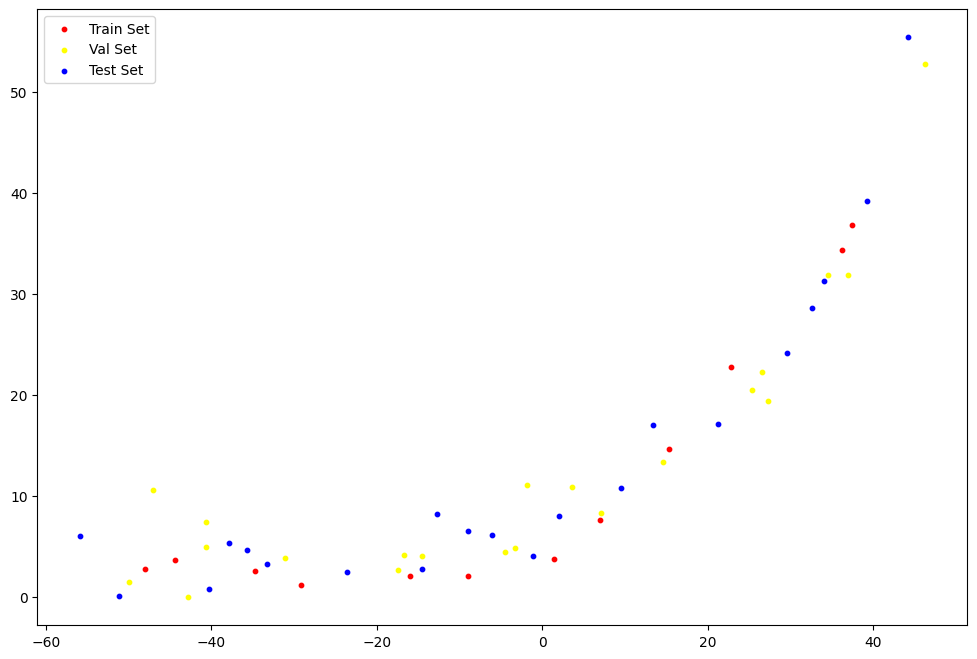

In [291]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(train_x, train_y, s=10, color="red", label="Train Set")
ax.scatter(val_x, val_y, s=10, color="yellow", label="Val Set")
ax.scatter(test_x, test_y, s=10, color="Blue", label="Test Set")
plt.legend(loc=2)
plt.show()

0.1 under
5 ok

In [574]:
from Bias import LinearRegression,loss,reg_loss,gradient,reg_gradient

epochs = 100
alpha = 0.1
regularize = False
scale = 5
x_norm = (train_x-train_x.mean(axis=0))/train_x.std(axis=0)
y_norm = (train_y-train_y.mean(axis=0))/train_y.std(axis=0)
train_loss = []
val_loss = []
model = LinearRegression()
model.init_theta(shape=(1,2))
for epoch in range(epochs):
    pred = model(x_norm)
    g = reg_gradient(x_norm, pred, y_norm, model.theta, scale) if regularize else gradient(x_norm, pred, y_norm)
    model.optimize(g,alpha)

    theta = model.theta.copy()
    _theta = model.theta.copy()
    _theta[0, 1:] = theta[0, 1:] / train_x.std(axis=0).T * train_y.std(axis=0)[0]
    _theta[0, 0] = theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(_theta[0, 1:], train_x.mean(axis=0).T)
    model.load_parameters(_theta)
    pred = model(train_x)
    t_loss = reg_loss(pred,train_y,model.theta,scale)# if regularize else loss(pred,train_y)
    train_loss.append(t_loss)
    pred_val = model(val_x)
    v_loss = reg_loss(pred_val,val_y,model.theta,scale)#  if regularize else loss(pred_val,val_y)
    val_loss.append(v_loss)

    print("Epoch: {}/{}\tTrain Loss: {:.4f}\tVal Loss: {:.4f}".format(epoch, epochs,t_loss,v_loss))
    model.load_parameters(theta)


theta_f = model.theta.copy()
theta_f[0, 1:] =  model.theta[0, 1:] / train_x.std(axis=0).T * train_y.std(axis=0)[0]
theta_f[0, 0] = model.theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(theta_f[0, 1:], train_x.mean(axis=0).T)

Epoch: 0/100	Train Loss: 67.4686	Val Loss: 155.5769
Epoch: 1/100	Train Loss: 58.9090	Val Loss: 148.9232
Epoch: 2/100	Train Loss: 51.9763	Val Loss: 143.7701
Epoch: 3/100	Train Loss: 46.3614	Val Loss: 139.8088
Epoch: 4/100	Train Loss: 41.8138	Val Loss: 136.7918
Epoch: 5/100	Train Loss: 38.1307	Val Loss: 134.5203
Epoch: 6/100	Train Loss: 35.1478	Val Loss: 132.8356
Epoch: 7/100	Train Loss: 32.7320	Val Loss: 131.6105
Epoch: 8/100	Train Loss: 30.7756	Val Loss: 130.7439
Epoch: 9/100	Train Loss: 29.1911	Val Loss: 130.1550
Epoch: 10/100	Train Loss: 27.9080	Val Loss: 129.7798
Epoch: 11/100	Train Loss: 26.8689	Val Loss: 129.5675
Epoch: 12/100	Train Loss: 26.0275	Val Loss: 129.4780
Epoch: 13/100	Train Loss: 25.3461	Val Loss: 129.4797
Epoch: 14/100	Train Loss: 24.7944	Val Loss: 129.5478
Epoch: 15/100	Train Loss: 24.3476	Val Loss: 129.6631
Epoch: 16/100	Train Loss: 23.9859	Val Loss: 129.8106
Epoch: 17/100	Train Loss: 23.6930	Val Loss: 129.9787
Epoch: 18/100	Train Loss: 23.4559	Val Loss: 130.1587
Epo

训练过程可视化

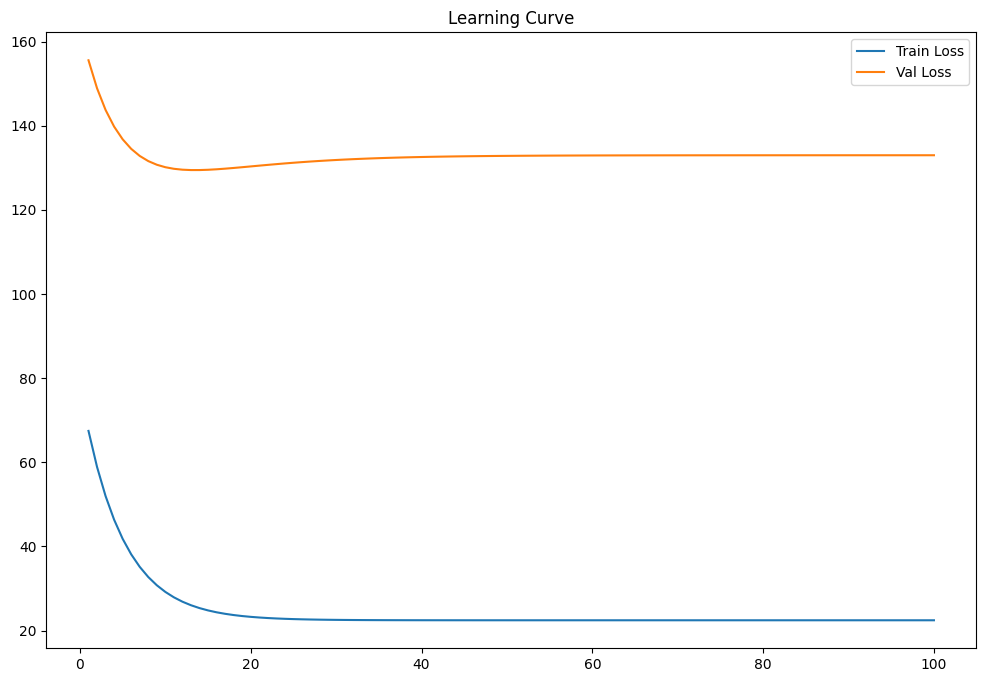

In [575]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epochs)+1, train_loss, label="Train Loss")
ax.plot(np.arange(epochs)+1, val_loss, label="Val Loss")
ax.set_title("Learning Curve")
plt.legend(loc=0)
plt.show()

决策边界

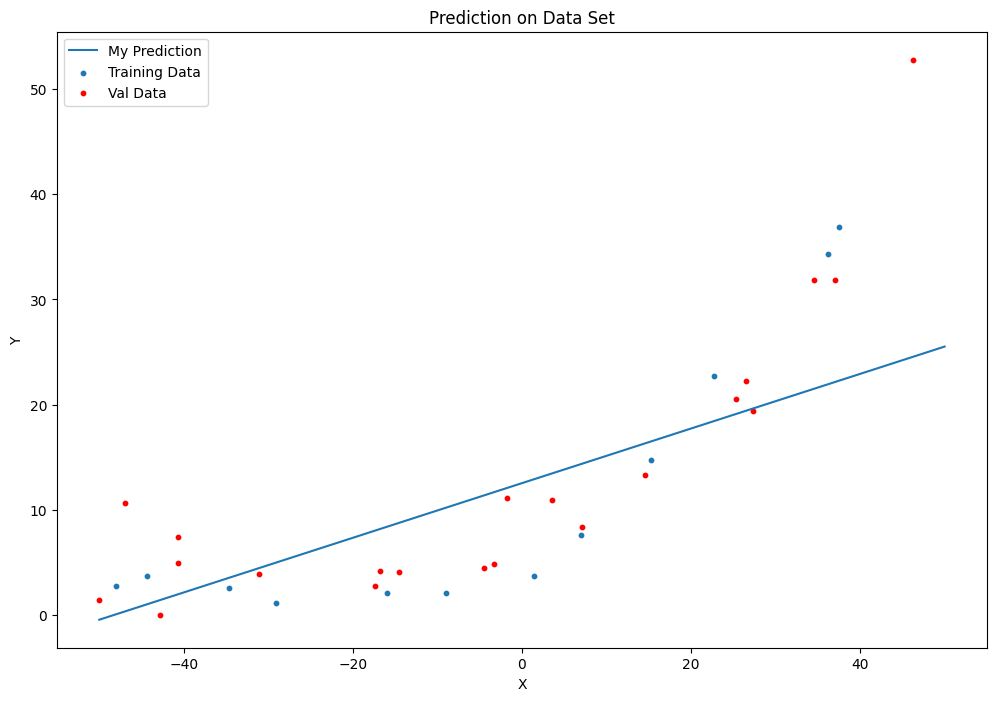

In [573]:
x = np.linspace(-50, 50, 100)
f = theta_f[0, 0] + (theta_f[0, 1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, label='My Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

数据增强

In [502]:
def feature_mapping(x, degree):
    # feature = np.zeros([x.shape[0],1])
    feature = [np.power(x[:,0],i) for i in range(1, degree+1)]
    return np.array(feature).T

train_x_map = feature_mapping(train_x,10)
val_x_map = feature_mapping(val_x,10)
train_x_map

array([[-1.59367581e+01,  2.53980260e+02, -4.04762197e+03,
         6.45059724e+04, -1.02801608e+06,  1.63832436e+07,
        -2.61095791e+08,  4.16102047e+09, -6.63131769e+10,
         1.05681706e+12],
       [-2.91529792e+01,  8.49896197e+02, -2.47770062e+04,
         7.22323546e+05, -2.10578833e+07,  6.13900035e+08,
        -1.78970150e+10,  5.21751305e+11, -1.52106050e+13,
         4.43434450e+14],
       [ 3.61895486e+01,  1.30968343e+03,  4.73968522e+04,
         1.71527069e+06,  6.20748719e+07,  2.24646160e+09,
         8.12984311e+10,  2.94215353e+12,  1.06475208e+14,
         3.85328972e+15],
       [ 3.74921873e+01,  1.40566411e+03,  5.27014222e+04,
         1.97589159e+06,  7.40804977e+07,  2.77743990e+09,
         1.04132297e+11,  3.90414759e+12,  1.46375033e+14,
         5.48792015e+15],
       [-4.80588295e+01,  2.30965109e+03, -1.10999128e+05,
         5.33448815e+06, -2.56369256e+08,  1.23208064e+10,
        -5.92123532e+11,  2.84567638e+13, -1.36759876e+15,
         6.

500 0.2 过拟合
20 欠拟合
1 ok

In [621]:
from Bias import LinearRegression,loss,reg_loss,gradient,reg_gradient

epochs = 500
alpha = 0.2
regularize = True
scale = 20
x_norm = (train_x_map-train_x_map.mean(axis=0))/train_x_map.std(axis=0)
y_norm = (train_y-train_y.mean(axis=0))/train_y.std(axis=0)
train_loss = []
val_loss = []
model = LinearRegression()
model.init_theta(shape=(1,11))
for epoch in range(epochs):
    pred = model(x_norm)
    g = reg_gradient(x_norm, pred, y_norm, model.theta, scale) if regularize else gradient(x_norm, pred, y_norm)
    model.optimize(g,alpha)

    theta = model.theta.copy()
    _theta = model.theta.copy()
    _theta[0, 1:] = theta[0, 1:] / train_x_map.std(axis=0).T * train_y.std(axis=0)[0]
    _theta[0, 0] = theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(_theta[0, 1:], train_x_map.mean(axis=0).T)
    model.load_parameters(_theta)
    pred = model(train_x_map)
    t_loss = reg_loss(pred,train_y,model.theta,scale)# if regularize else loss(pred,train_y)
    train_loss.append(t_loss)
    pred_val = model(val_x_map)
    v_loss = reg_loss(pred_val,val_y,model.theta,scale)#  if regularize else loss(pred_val,val_y)
    val_loss.append(v_loss)

    print("Epoch: {}/{}\tTrain Loss: {:.4f}\tVal Loss: {:.4f}".format(epoch, epochs,t_loss,v_loss))
    model.load_parameters(theta)


theta_f = model.theta.copy()
theta_f[0, 1:] =  model.theta[0, 1:] / train_x_map.std(axis=0).T * train_y.std(axis=0)[0]
theta_f[0, 0] = model.theta[0, 0] * train_y.std(axis=0)[0] + train_y.mean(axis=0)[0] - np.dot(theta_f[0, 1:], train_x_map.mean(axis=0).T)

Epoch: 0/500	Train Loss: 46.8957	Val Loss: 159.5169
Epoch: 1/500	Train Loss: 43.0992	Val Loss: 82.1103
Epoch: 2/500	Train Loss: 34.3336	Val Loss: 127.1256
Epoch: 3/500	Train Loss: 38.8285	Val Loss: 70.5626
Epoch: 4/500	Train Loss: 32.8731	Val Loss: 124.2478
Epoch: 5/500	Train Loss: 39.0569	Val Loss: 68.5289
Epoch: 6/500	Train Loss: 33.3619	Val Loss: 126.5288
Epoch: 7/500	Train Loss: 40.2201	Val Loss: 68.2377
Epoch: 8/500	Train Loss: 34.3262	Val Loss: 130.0326
Epoch: 9/500	Train Loss: 41.6960	Val Loss: 68.3688
Epoch: 10/500	Train Loss: 35.5039	Val Loss: 134.0576
Epoch: 11/500	Train Loss: 43.3812	Val Loss: 68.6980
Epoch: 12/500	Train Loss: 36.8600	Val Loss: 138.5032
Epoch: 13/500	Train Loss: 45.2736	Val Loss: 69.2064
Epoch: 14/500	Train Loss: 38.4053	Val Loss: 143.3860
Epoch: 15/500	Train Loss: 47.3928	Val Loss: 69.9159
Epoch: 16/500	Train Loss: 40.1622	Val Loss: 148.7486
Epoch: 17/500	Train Loss: 49.7657	Val Loss: 70.8589
Epoch: 18/500	Train Loss: 42.1578	Val Loss: 154.6426
Epoch: 19/50

训练过程可视化

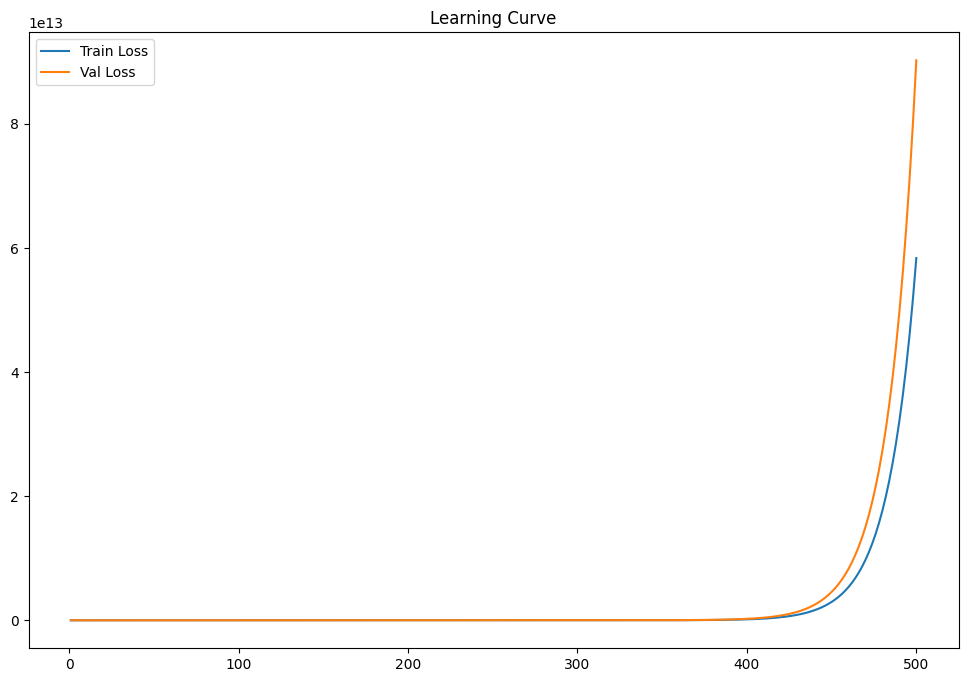

In [622]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(np.arange(epochs)+1, train_loss, label="Train Loss")
ax.plot(np.arange(epochs)+1, val_loss, label="Val Loss")
# plt.xlim(200,500)
# plt.ylim(0,40)
ax.set_title("Learning Curve")
plt.legend(loc=0)
plt.show()

决策边界可视化

[[-5.88744607e+06 -3.20786957e+04  1.36622068e+03 -2.45734727e+01
   7.09135221e-01 -1.35744000e-02  3.33093971e-04 -6.58655195e-06
   1.49045769e-07 -3.01000614e-09  6.53621593e-11]]


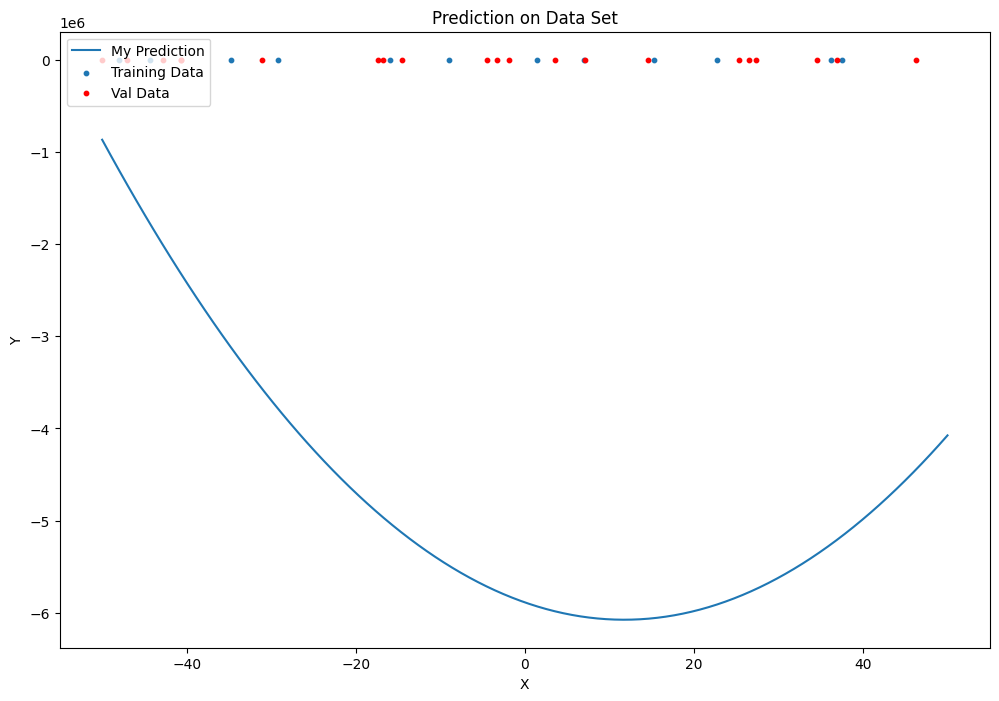

In [623]:
print(theta_f)
x = np.linspace(-50, 50, 100)
f = theta_f[0, 0] + (theta_f[0, 1] * x) + (theta_f[0, 2] * x ** 2)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, label='My Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()